In [2]:
# ############################################################

# ## parsing_by_dayofweek ##

# ############################################################

# -- Designed by

#    김상원

# -- Produced by Mar. 31, 2020. (Ver.1.)

# -- Description: xxx

# ============================================================

In [22]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
from pylab import figure, axes, pie, title, savefig

In [4]:
df = pd.read_csv("/Users/sangwon/workspace/school/bithumb_analysis/raw_data/2018-05-btc-krw.csv") # csv load

In [5]:
df.dtypes # identifying column type 

timestamp     object
quantity     float64
price          int64
fee            int64
amount         int64
side           int64
dtype: object

In [6]:
## converting timestamp column type 'object' to 'datetime'
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df.dtypes

timestamp    datetime64[ns]
quantity            float64
price                 int64
fee                   int64
amount                int64
side                  int64
dtype: object

In [7]:
## converting timestamp to detailed date column
df['timestamp_year_month_day']       = df['timestamp'].dt.date         # YYYY-MM-DD(문자)
df['timestamp_year']       = df['timestamp'].dt.year         # 연(4자리숫자)
df['timestamp_month']      = df['timestamp'].dt.month        # 월(숫자)
df['timestamp_month_name'] = df['timestamp'].dt.month_name() # 월(문자)

df['timestamp_day']        = df['timestamp'].dt.day          # 일(숫자)
df['timestamp_time']       = df['timestamp'].dt.time         # HH:MM:SS(문자)
df['timestamp_hour']       = df['timestamp'].dt.hour         # 시(숫자)
df['timestamp_minute']     = df['timestamp'].dt.minute       # 분(숫자)
df['timestamp_second']     = df['timestamp'].dt.second       # 초(숫자)
df['timestamp_dayofweek']     = df['timestamp'].dt.weekday_name      # 요일(문자)

In [8]:
df

,timestamp,quantity,price,fee,amount,side,timestamp_year_month_day,timestamp_year,timestamp_month,timestamp_month_name,timestamp_day,timestamp_time,timestamp_hour,timestamp_minute,timestamp_second,timestamp_dayofweek
0,2018-05-01 01:06:02,0.8064,10164000,0,-8196250,0,2018-05-01,2018,5,May,1,01:06:02,1,6,2,Tuesday
1,2018-05-01 01:06:16,0.1000,10163000,0,1016300,1,2018-05-01,2018,5,May,1,01:06:16,1,6,16,Tuesday
2,2018-05-01 01:06:20,0.1000,10163000,0,1016300,1,2018-05-01,2018,5,May,1,01:06:20,1,6,20,Tuesday
3,2018-05-01 01:06:24,0.3382,10162000,0,3436788,1,2018-05-01,2018,5,May,1,01:06:24,1,6,24,Tuesday
4,2018-05-01 01:06:28,0.1000,10153000,0,1015300,1,2018-05-01,2018,5,May,1,01:06:28,1,6,28,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23290,2018-05-31 23:19:25,0.2509,8338000,0,2092004,1,2018-05-31,2018,5,May,31,23:19:25,23,19,25,Thursday
23291,2018-05-31 23:21:03,0.0390,8342000,0,325338,1,2018-05-31,2018,5,May,31,23:21:03,23,21,3,Thursday
23292,2018-05-31 23:21:05,0.4258,8342000,0,3552024,1,2018-05-31,2018,5,May,31,23:21:05,23,21,5,Thursday
23293,2018-05-31 23:21:08,0.1126,8342000,0,939309,1,2018-05-31,2018,5,May,31,23:21:08,23,21,8,Thursday


In [9]:
## creating 'dayofweek - amount' connection
group_dayofweek_amount = df['amount'].groupby(df['timestamp_dayofweek'])

In [10]:
## 요일별 transaction 수
group_dayofweek_amount.size()

timestamp_dayofweek
Friday       3517
Monday       3135
Saturday     2883
Sunday       2832
Thursday     3208
Tuesday      3887
Wednesday    3833
Name: amount, dtype: int64

In [11]:
## 요일별 총 손익량
group_dayofweek_amount.sum()

timestamp_dayofweek
Friday       30070846
Monday       13408322
Saturday    -12036404
Sunday      -37623660
Thursday     17844015
Tuesday     -30094735
Wednesday    30430922
Name: amount, dtype: int64

In [12]:
## creating 'dayofweek - earning amount' connection
df2 = df.copy()
df2 =df2[df2['amount'] > 0]
group_dayofweek_amount_positive = df2['amount'].groupby(df2['timestamp_dayofweek'])

In [13]:
# 요일별 수익 transaction 수
group_dayofweek_amount_positive.size()

timestamp_dayofweek
Friday       2234
Monday       2017
Saturday     1805
Sunday       1831
Thursday     1927
Tuesday      2645
Wednesday    2409
Name: amount, dtype: int64

In [14]:
# 요일별 수익량
group_dayofweek_amount_positive.sum()

timestamp_dayofweek
Friday       5757050144
Monday       5080898929
Saturday     3951046180
Sunday       3983087119
Thursday     4938014335
Tuesday      6796592511
Wednesday    6127587298
Name: amount, dtype: int64

In [15]:
## creating 'dayofweek - loss amount' connection
df3 = df.copy()
df3 = df3[df3['amount'] < 0]
group_dayofweek_amount_negative = df3['amount'].groupby(df3['timestamp_dayofweek'])

In [16]:
# 요일별 손해 transaction 수
group_dayofweek_amount_negative.size()

timestamp_dayofweek
Friday       1283
Monday       1118
Saturday     1078
Sunday       1001
Thursday     1281
Tuesday      1242
Wednesday    1424
Name: amount, dtype: int64

In [17]:
# 요일별 손해량
group_dayofweek_amount_negative.sum()

timestamp_dayofweek
Friday      -5726979298
Monday      -5067490607
Saturday    -3963082584
Sunday      -4020710779
Thursday    -4920170320
Tuesday     -6826687246
Wednesday   -6097156376
Name: amount, dtype: int64

In [18]:
# 요일별 절대값 총합
absolute_negative_sum=group_dayofweek_amount_negative.sum()
absolute_negative_sum = absolute_negative_sum * (-1)
absolute_total_amout=absolute_negative_sum+group_dayofweek_amount_positive.sum()
absolute_total_amout

timestamp_dayofweek
Friday       11484029442
Monday       10148389536
Saturday      7914128764
Sunday        8003797898
Thursday      9858184655
Tuesday      13623279757
Wednesday    12224743674
Name: amount, dtype: int64

In [26]:
## 일별 계산 table 생성
dfs = [group_dayofweek_amount.size(), group_dayofweek_amount.sum(), group_dayofweek_amount_positive.size(), group_dayofweek_amount_positive.sum(), group_dayofweek_amount_negative.size(), group_dayofweek_amount_negative.sum(), absolute_total_amout, absolute_negative_sum]
day_df_final = reduce(lambda left,right: pd.merge(left,right,on='timestamp_dayofweek'), dfs)
day_df_final.columns = [ "dayofweek transaction", "dayofweek income", "dayofweek Yield transaction", "dayofweek Yield", "dayofweek loss transaction", "dayofweek loss", "dayofweek absolute amount", "dayofweek absolute negative amount"]
day_df_final

,dayofweek transaction,dayofweek income,dayofweek Yield transaction,dayofweek Yield,dayofweek loss transaction,dayofweek loss,dayofweek absolute amount,dayofweek absolute negative amount
timestamp_dayofweek,,,,,,,,
Friday,3517,30070846,2234,5757050144,1283,-5726979298,11484029442,5726979298
Monday,3135,13408322,2017,5080898929,1118,-5067490607,10148389536,5067490607
Saturday,2883,-12036404,1805,3951046180,1078,-3963082584,7914128764,3963082584
Sunday,2832,-37623660,1831,3983087119,1001,-4020710779,8003797898,4020710779
Thursday,3208,17844015,1927,4938014335,1281,-4920170320,9858184655,4920170320
Tuesday,3887,-30094735,2645,6796592511,1242,-6826687246,13623279757,6826687246
Wednesday,3833,30430922,2409,6127587298,1424,-6097156376,12224743674,6097156376


In [36]:
day_df_final=day_df_final.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

In [37]:
day_df_final.to_csv("/Users/sangwon/workspace/school/bithumb_analysis/table/dayofweek_result_table.csv", header=True, index=True, encoding = 'utf-8')

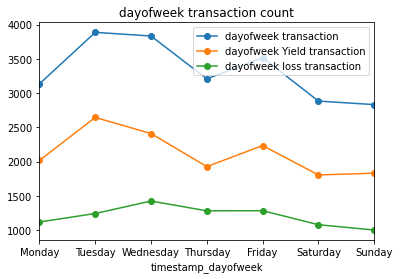

In [50]:
day_df_final[['dayofweek transaction', 'dayofweek Yield transaction', 'dayofweek loss transaction']].plot(title='dayofweek transaction count', marker='o')
plt.savefig('/Users/sangwon/workspace/school/bithumb_analysis/graph/dayofweek transaction count.png', dpi=300)

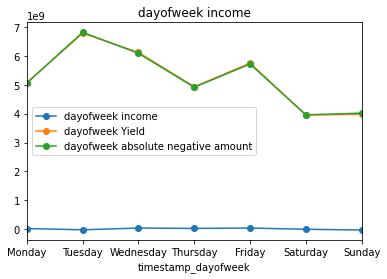

In [48]:
day_df_final[['dayofweek income', 'dayofweek Yield', 'dayofweek absolute negative amount']].plot(title='dayofweek income', marker='o')
plt.savefig('/Users/sangwon/workspace/school/bithumb_analysis/graph/dayofweek income.png', dpi=300)

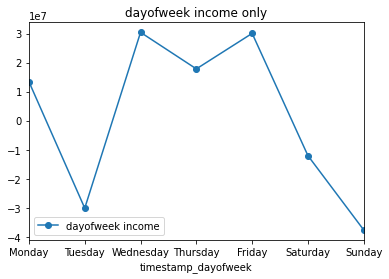

In [49]:
day_df_final[['dayofweek income']].plot(title='dayofweek income only', marker='o')
plt.savefig('/Users/sangwon/workspace/school/bithumb_analysis/graph/datofweek income only.png', dpi=300)